In [1]:
%pylab inline
num_samples = 44100
input1 = linspace(-1, 1, num_samples)
input2 = linspace(1, -1, num_samples)

Populating the interactive namespace from numpy and matplotlib


In [2]:
cat 01_greater.stride

use DesktopAudio version 1.0

AudioIn >> Greater() >> AudioOut[0];


In [3]:
out_text = ''


for val1, val2 in zip(input1, input2):
    if val1 > val2:
        output = 1
    else:
        output = 0
    out_text += str(output) + "\n" +"0.0\n"

out_file = open("01_greater.expected", "w")
out_file.write(out_text[:-1])

pass

In [4]:
cat 02_oscillator.stride

use DesktopAudio version 1.0

import Generators

Oscillator() >> AudioOut[0];

In [5]:
out_text = ''

phase = 0.0
inc = 2.0 * np.pi* 440.0/44100.0

for val1, val2 in zip(input1, input2):
    output = sin(phase)
    phase += inc
    if phase > (2.0 * np.pi):
        phase -= (2.0 * np.pi)
    out_text += str(output) + "\n" +"0.0\n"

out_file = open("02_oscillator.expected", "w")
out_file.write(out_text[:-1])

pass

In [7]:
cat 03_oscillator_impulse.stride

use DesktopAudio version 1.0

import Generators

Oscillator() >> AudioOut[1];

Impulse() >> AudioOut[2];


In [6]:
out_text = ''

phase = 0.0
inc = 2.0 * np.pi* 440.0/44100.0

phase2 = 1.0
inc2 = 1.0/44100.0

for val1, val2 in zip(input1, input2):
    output = sin(phase)
    phase += inc
    if phase > (2.0 * np.pi):
        phase -= (2.0 * np.pi)
        
    output2 = 0.0
    phase2 += inc2
    if phase2 >= 1.0:
        phase2 -= 1.0
        output2 = 1.0
    out_text += str(output) + "\n" + str(output2)+ "\n"

out_file = open("03_oscillator_impulse.expected", "w")
out_file.write(out_text[:-1])

pass

In [4]:
inc2

0.0099773239

In [10]:
cat 04_sum.stride

use DesktopAudio version 1.0

AudioIn >> Sum() >> AudioOut[1];

[1.0, AudioIn[2], 0.5, AudioIn[1]] >> Sum() >> AudioOut[2];



In [2]:
out_text = ''

phase = 0.0

for val1, val2 in zip(input1, input2):
    total = 1.0 + val1 + 0.5 + val2
    out_text += str(val1 + val2) + "\n" + str(total)+ "\n"

out_file = open("04_sum.expected", "w")
out_file.write(out_text[:-1])

pass

In [13]:


f = open('/home/andres/Documents/src/Stride/build-Stride-Desktop_Qt_5_9_2_GCC_64bit2-Debug/tests/failed.output')

In [15]:
f = open('/home/andres/Documents/src/Stride/build-Stride-Desktop_Qt_5_9_2_GCC_64bit2-Debug/tests/failed.output')
values = [float(line) for line in f.readlines()]

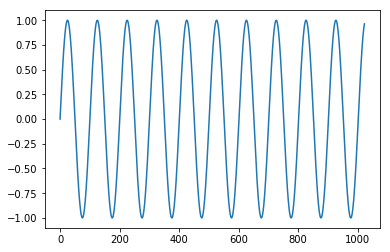

In [17]:
plot(values[::2][:1024])

In [19]:
f = open('/home/andres/Documents/src/Stride/Stride/strideroot/frameworks/RtAudio/1.0/_tests/platform/02_oscillator.expected')
expected = [float(line) for line in f.readlines()]

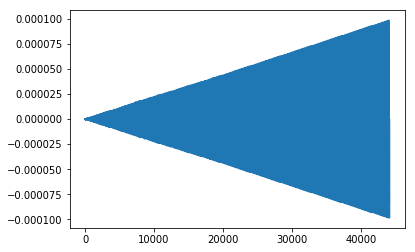

In [26]:
plot(np.array(expected)[:44100] - np.array(values))